In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust1386.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust2777.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust2215.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust2626.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust2799.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust1558.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust3658.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust1521.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust1627.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust3703.png
/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf/yellow_rust/YellowRust2370.png
/kaggle/input/wheat-l

In [21]:
# ============================================================================
# FIND YOUR DATASET PATH - RUN THIS FIRST
# ============================================================================
import os

print("🔍 FINDING YOUR DATASET...")
print("="*80)

# List all available datasets
print("\n📂 Available datasets in /kaggle/input/:")
for dataset in os.listdir('/kaggle/input/'):
    print(f"  • {dataset}")

# Pick your dataset name and explore it
dataset_name = 'wheat-leaf-disease-vrinda-bhatia'  # CHANGE THIS to your actual dataset name

print(f"\n📂 Exploring /kaggle/input/{dataset_name}/:")
base = f'/kaggle/input/{dataset_name}'

def show_structure(path, prefix="", max_depth=3, current_depth=0):
    if current_depth >= max_depth:
        return
    try:
        items = sorted(os.listdir(path))
        for i, item in enumerate(items[:20]):  # Show first 20 items
            item_path = os.path.join(path, item)
            is_last = i == len(items) - 1
            
            if os.path.isdir(item_path):
                print(f"{prefix}{'└── ' if is_last else '├── '}📁 {item}/")
                # Count images in this folder
                try:
                    imgs = [f for f in os.listdir(item_path) 
                           if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]
                    if imgs:
                        print(f"{prefix}{'    ' if is_last else '│   '}    → {len(imgs)} images")
                except:
                    pass
                # Recurse
                new_prefix = prefix + ("    " if is_last else "│   ")
                show_structure(item_path, new_prefix, max_depth, current_depth + 1)
            else:
                # Show file extension
                ext = os.path.splitext(item)[1]
                print(f"{prefix}{'└── ' if is_last else '├── '}📄 {item}")
    except Exception as e:
        print(f"{prefix}❌ Error: {e}")

show_structure(base)

print("\n" + "="*80)
print("💡 FIND THE FOLDER THAT CONTAINS YOUR CLASS FOLDERS")
print("   Then set: BASE_PATH = '/kaggle/input/dataset-name/that-folder/'")
print("="*80)


🔍 FINDING YOUR DATASET...

📂 Available datasets in /kaggle/input/:
  • wheat-leaf-disease-vrinda-bhatia

📂 Exploring /kaggle/input/wheat-leaf-disease-vrinda-bhatia/:
└── 📁 wheat_leaf/
    ├── 📁 Healthy/
    │       → 224 images
    │   ├── 📄 Healthy0.png
    │   ├── 📄 Healthy1019.png
    │   ├── 📄 Healthy1042.png
    │   ├── 📄 Healthy1065.png
    │   ├── 📄 Healthy1084.png
    │   ├── 📄 Healthy1110.png
    │   ├── 📄 Healthy1112.png
    │   ├── 📄 Healthy1171.png
    │   ├── 📄 Healthy1177.png
    │   ├── 📄 Healthy1201.png
    │   ├── 📄 Healthy1226.png
    │   ├── 📄 Healthy1237.png
    │   ├── 📄 Healthy124.png
    │   ├── 📄 Healthy1270.png
    │   ├── 📄 Healthy1280.png
    │   ├── 📄 Healthy1298.png
    │   ├── 📄 Healthy13.png
    │   ├── 📄 Healthy1311.png
    │   ├── 📄 Healthy1318.png
    │   ├── 📄 Healthy1339.png
    ├── 📁 Loose Smut/
    │       → 244 images
    │   ├── 📄 0011.jpg
    │   ├── 📄 0021.jpg
    │   ├── 📄 0031.jpg
    │   ├── 📄 0041.jpg
    │   ├── 📄 004_clip_image002.jpg
   

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, cv2, random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input  # CRITICAL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

print("🌾 WHEAT DISEASE DETECTION - OPTIMIZED")
print(f"TensorFlow: {tf.__version__} | GPU: {len(tf.config.list_physical_devices('GPU'))}")


🌾 WHEAT DISEASE DETECTION - OPTIMIZED
TensorFlow: 2.18.0 | GPU: 2


In [23]:
# ============================================================================
# CONFIGURATION
# ============================================================================
BASE_PATH = '/kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf'  # ✅ UPDATED
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50



🔍 Exploring: /kaggle/input/wheat-leaf-disease-vrinda-bhatia/wheat_leaf
✓ Healthy                  :  224 images
✓ Loose Smut               :  247 images
✓ brown_rust               :  215 images
✓ mildew                   :  161 images
✓ septoria                 :  180 images
✓ stripe_rust              :  208 images
✓ yellow_rust              :  239 images

✅ Total: 1474 images | Classes: 7 | Avg: 211


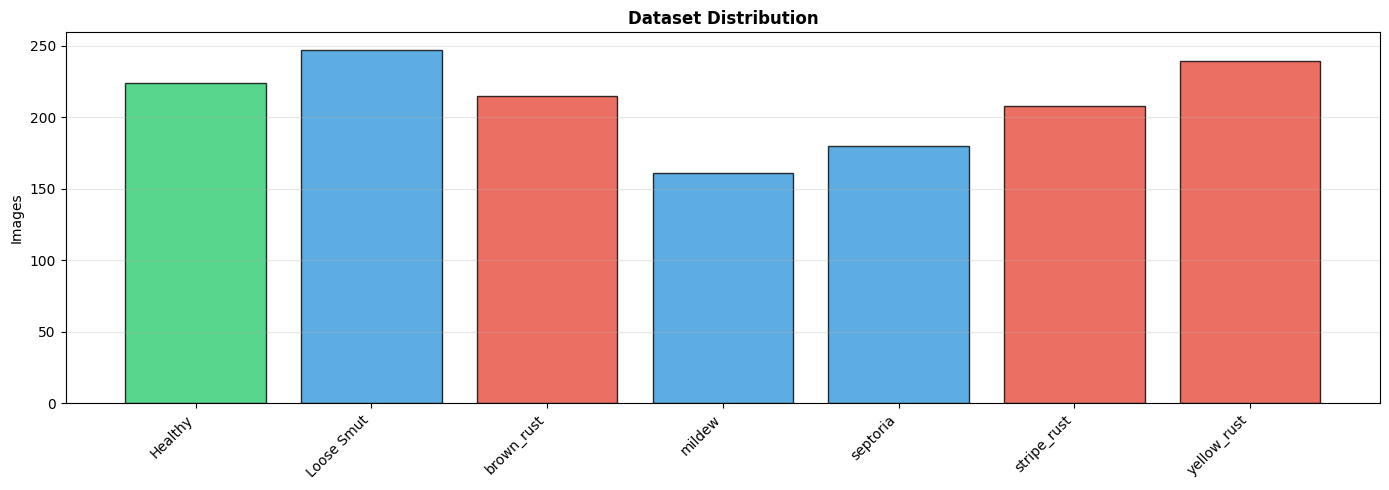


✅ Found 7 classes: ['Healthy', 'Loose Smut', 'brown_rust', 'mildew', 'septoria', 'stripe_rust', 'yellow_rust']


In [24]:
# ============================================================================
# DATA EXPLORATION - FIXED FOR VARIOUS FOLDER STRUCTURES
# ============================================================================
def explore_dataset(path):
    print(f"\n🔍 Exploring: {path}")
    print("="*80)
    
    categories, counts = [], []
    
    try:
        items = sorted(os.listdir(path))
        for item in items:
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                imgs = [f for f in os.listdir(item_path) 
                       if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.gif'))]
                if imgs:
                    categories.append(item)
                    counts.append(len(imgs))
                    print(f"✓ {item:25s}: {len(imgs):4d} images")
    except Exception as e:
        print(f"❌ Error: {e}")
        return []
    
    if not categories:
        print("\n❌ NO CLASS FOLDERS FOUND!")
        return []
    
    print(f"\n{'='*80}")
    print(f"✅ Total: {sum(counts)} images | Classes: {len(categories)} | Avg: {sum(counts)/len(categories):.0f}")
    
    # Visualization
    plt.figure(figsize=(14, 5))
    colors = ['#2ecc71' if c=='Healthy' else '#e74c3c' if 'rust' in c.lower() else '#3498db' for c in categories]
    plt.bar(categories, counts, color=colors, edgecolor='black', alpha=0.8)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Images')
    plt.title('Dataset Distribution', fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return categories

categories = explore_dataset(BASE_PATH)

# Safety check
if not categories:
    print("\n⚠️  Dataset not found. Please check BASE_PATH.")
else:
    print(f"\n✅ Found {len(categories)} classes: {categories}")


In [25]:
# ============================================================================
# CLASS WEIGHTS
# ============================================================================
def get_class_weights(path, categories):
    counts = [len([f for f in os.listdir(os.path.join(path, c)) 
                   if f.lower().endswith(('.jpg','.png','.jpeg'))]) for c in categories]
    total = sum(counts)
    weights = {i: total/(len(categories)*c) for i, c in enumerate(counts)}
    print("\n⚖️  Class Weights:")
    for i, c in enumerate(categories):
        print(f"  {c:20s}: {weights[i]:.3f}")
    return weights

class_weights = get_class_weights(BASE_PATH, categories)



⚖️  Class Weights:
  Healthy             : 0.938
  Loose Smut          : 0.861
  brown_rust          : 0.977
  mildew              : 1.305
  septoria            : 1.167
  stripe_rust         : 1.010
  yellow_rust         : 0.879


In [26]:
# ============================================================================
# DATA GENERATORS WITH PROPER EFFICIENTNET PREPROCESSING
# ============================================================================
print("\n🔧 Data Augmentation:")
print("  ✅ EfficientNet preprocessing (NOT just rescale)")
print("  ✅ Brightness variation added")
print("  ✅ Vertical flip DISABLED (leaf orientation matters)")

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ✅ PROPER EFFICIENTNET PREPROCESSING
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,          # ✅ FIXED - orientation matters
    brightness_range=[0.8, 1.2],  # ✅ ADDED
    fill_mode='nearest',
    validation_split=0.2
)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ✅ PROPER EFFICIENTNET PREPROCESSING
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    BASE_PATH, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training', shuffle=True, seed=42
)

val_gen = valid_datagen.flow_from_directory(
    BASE_PATH, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation', shuffle=False, seed=42
)

class_names = list(train_gen.class_indices.keys())
n_classes = len(class_names)

print(f"\n✓ Training: {train_gen.samples} | Validation: {val_gen.samples}")
print(f"✓ Classes ({n_classes}): {class_names}")



🔧 Data Augmentation:
  ✅ EfficientNet preprocessing (NOT just rescale)
  ✅ Brightness variation added
  ✅ Vertical flip DISABLED (leaf orientation matters)
Found 1180 images belonging to 7 classes.
Found 291 images belonging to 7 classes.

✓ Training: 1180 | Validation: 291
✓ Classes (7): ['Healthy', 'Loose Smut', 'brown_rust', 'mildew', 'septoria', 'stripe_rust', 'yellow_rust']


In [27]:
# ============================================================================
# MODEL ARCHITECTURE
# ============================================================================
def build_model(n_classes):
    base = EfficientNetB0(include_top=False, weights='imagenet', 
                          input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base.trainable = False
    
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(n_classes, activation='softmax')(x)
    
    model = keras.Model(inputs, outputs)
    return model, base

model, base_model = build_model(n_classes)
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3), 
             keras.metrics.Precision(), keras.metrics.Recall()]
)

print(f"\n🏗️  Model: EfficientNetB0 | Layers: {len(base_model.layers)}")
model.summary()



🏗️  Model: EfficientNetB0 | Layers: 238


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,846,762 (18.49 MB)

 Trainable params: 793,095 (3.03 MB)

 Non-trainable params: 4,053,667 (15.46 MB)

In [28]:
# ============================================================================
# CALLBACKS
# ============================================================================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]


In [29]:
# ============================================================================
# PHASE 1: TRAIN WITH FROZEN BASE
# ============================================================================
print("\n🚀 PHASE 1: Training top layers (base frozen)...")
hist1 = model.fit(train_gen, validation_data=val_gen, epochs=20, 
                  class_weight=class_weights, callbacks=callbacks, verbose=1)



🚀 PHASE 1: Training top layers (base frozen)...
Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3565 - loss: 2.0533 - precision_2: 0.4166 - recall_2: 0.2757 - top_k_categorical_accuracy: 0.6778
Epoch 1: val_accuracy improved from -inf to 0.62887, saving model to best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.3600 - loss: 2.0410 - precision_2: 0.4207 - recall_2: 0.2793 - top_k_categorical_accuracy: 0.6807 - val_accuracy: 0.6289 - val_loss: 1.1767 - val_precision_2: 0.9770 - val_recall_2: 0.2921 - val_top_k_categorical_accuracy: 0.8591 - learning_rate: 0.0010
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6999 - loss: 0.9228 - precision_2: 0.7763 - recall_2: 0.6479 - top_k_categorical_accuracy: 0.9131
Epoch 2: val_accuracy did not improve from 0.62887
37/37 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6996 - loss: 0.9231 - precision_2: 0.7759 - recall_2: 0.6472 - top_k_categorical_accuracy: 0.9130 - val_accuracy: 0.6082 - val_loss: 1.0253 - val_precision_2: 0.9000 - val_recall_2: 0.4021 - val_top_k_categorical_accuracy: 0.8969 - learning_rate: 0.0010
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7223 - loss: 0.7824 - precision_2: 0.7788 - recall_2: 0.6603 - top_k_categorical_accuracy: 0.9410
Epoch 3: val

37/37 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.7224 - loss: 0.7831 - precision_2: 0.7787 - recall_2: 0.6605 - top_k_categorical_accuracy: 0.9408 - val_accuracy: 0.6942 - val_loss: 0.8838 - val_precision_2: 0.8743 - val_recall_2: 0.5017 - val_top_k_categorical_accuracy: 0.9141 - learning_rate: 0.0010
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7303 - loss: 0.7812 - precision_2: 0.8038 - recall_2: 0.6841 - top_k_categorical_accuracy: 0.9293
Epoch 4: val_accuracy improved from 0.69416 to 0.74227, saving model to best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7307 - loss: 0.7802 - precision_2: 0.8038 - recall_2: 0.6845 - top_k_categorical_accuracy: 0.9296 - val_accuracy: 0.7423 - val_loss: 0.7882 - val_precision_2: 0.8984 - val_recall_2: 0.5773 - val_top_k_categorical_accuracy: 0.9244 - learning_rate: 0.0010
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7631 - loss: 0.6805 - precision_2: 0.8068 - recall_2: 0.7245 - top_k_categorical_accuracy: 0.9482
Epoch 5: val_accuracy did not improve from 0.74227
37/37 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7631 - loss: 0.6803 - precision_2: 0.8066 - recall_2: 0.7244 - top_k_categorical_accuracy: 0.9483 - val_accuracy: 0.7182 - val_loss: 0.8134 - val_precision_2: 0.8705 - val_recall_2: 0.5773 - val_top_k_categorical_accuracy: 0.9347 - learning_rate: 0.0010
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7954 - loss: 0.5654 - precision_2: 0.8369 - recall_2: 0.7517 - top_k_categorical_accuracy: 0.9653
Epoch 6: val_

37/37 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7954 - loss: 0.5658 - precision_2: 0.8371 - recall_2: 0.7517 - top_k_categorical_accuracy: 0.9652 - val_accuracy: 0.7663 - val_loss: 0.7129 - val_precision_2: 0.8578 - val_recall_2: 0.6632 - val_top_k_categorical_accuracy: 0.9244 - learning_rate: 0.0010
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8161 - loss: 0.5435 - precision_2: 0.8447 - recall_2: 0.7757 - top_k_categorical_accuracy: 0.9693
Epoch 7: val_accuracy did not improve from 0.76632
37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8161 - loss: 0.5433 - precision_2: 0.8449 - recall_2: 0.7758 - top_k_categorical_accuracy: 0.9694 - val_accuracy: 0.7457 - val_loss: 0.6957 - val_precision_2: 0.8361 - val_recall_2: 0.6838 - val_top_k_categorical_accuracy: 0.9313 - learning_rate: 0.0010
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7781 - loss: 0.5931 - precision_2: 0.8213 - recall_2: 0.7465 - top_k_categorical_accuracy: 0.9587
Epoch 8: val_

37/37 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8359 - loss: 0.4385 - precision_2: 0.8646 - recall_2: 0.8041 - top_k_categorical_accuracy: 0.9871 - val_accuracy: 0.8007 - val_loss: 0.5749 - val_precision_2: 0.8492 - val_recall_2: 0.7354 - val_top_k_categorical_accuracy: 0.9485 - learning_rate: 0.0010
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8084 - loss: 0.5684 - precision_2: 0.8433 - recall_2: 0.7882 - top_k_categorical_accuracy: 0.9766
Epoch 11: val_accuracy did not improve from 0.80069
37/37 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8089 - loss: 0.5665 - precision_2: 0.8438 - recall_2: 0.7885 - top_k_categorical_accuracy: 0.9766 - val_accuracy: 0.7801 - val_loss: 0.5556 - val_precision_2: 0.8346 - val_recall_2: 0.7457 - val_top_k_categorical_accuracy: 0.9519 - learning_rate: 0.0010
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8271 - loss: 0.4191 - precision_2: 0.8611 - recall_2: 0.7986 - top_k_categorical_accuracy: 0.9915
Epoch 12: 

37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8272 - loss: 0.4190 - precision_2: 0.8609 - recall_2: 0.7988 - top_k_categorical_accuracy: 0.9914 - val_accuracy: 0.8076 - val_loss: 0.5154 - val_precision_2: 0.8706 - val_recall_2: 0.7629 - val_top_k_categorical_accuracy: 0.9519 - learning_rate: 0.0010
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8730 - loss: 0.3708 - precision_2: 0.9067 - recall_2: 0.8517 - top_k_categorical_accuracy: 0.9833
Epoch 13: val_accuracy did not improve from 0.80756
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8725 - loss: 0.3717 - precision_2: 0.9062 - recall_2: 0.8512 - top_k_categorical_accuracy: 0.9834 - val_accuracy: 0.8041 - val_loss: 0.5623 - val_precision_2: 0.8654 - val_recall_2: 0.7732 - val_top_k_categorical_accuracy: 0.9519 - learning_rate: 0.0010
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8591 - loss: 0.4231 - precision_2: 0.8871 - recall_2: 0.8369 - top_k_categorical_accuracy: 0.9857
Epoch 14: 

37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8422 - loss: 0.4102 - precision_2: 0.8736 - recall_2: 0.8154 - top_k_categorical_accuracy: 0.9875 - val_accuracy: 0.8110 - val_loss: 0.5296 - val_precision_2: 0.8726 - val_recall_2: 0.7766 - val_top_k_categorical_accuracy: 0.9485 - learning_rate: 0.0010
Epoch 16/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8729 - loss: 0.3697 - precision_2: 0.9033 - recall_2: 0.8426 - top_k_categorical_accuracy: 0.9814
Epoch 16: val_accuracy did not improve from 0.81100
37/37 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8727 - loss: 0.3703 - precision_2: 0.9032 - recall_2: 0.8424 - top_k_categorical_accuracy: 0.9814 - val_accuracy: 0.8076 - val_loss: 0.5853 - val_precision_2: 0.8500 - val_recall_2: 0.7595 - val_top_k_categorical_accuracy: 0.9450 - learning_rate: 0.0010
Epoch 17/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8342 - loss: 0.4447 - precision_2: 0.8560 - recall_2: 0.8107 - top_k_categorical_accuracy: 0.9807
Epoch 17: 

37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8818 - loss: 0.3664 - precision_2: 0.8969 - recall_2: 0.8500 - top_k_categorical_accuracy: 0.9864 - val_accuracy: 0.8144 - val_loss: 0.5192 - val_precision_2: 0.8571 - val_recall_2: 0.7835 - val_top_k_categorical_accuracy: 0.9656 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 12.


In [30]:
# ============================================================================
# PHASE 2: FINE-TUNE WITH SMART UNFREEZING
# ============================================================================
print("\n🔥 PHASE 2: Fine-tuning...")
base_model.trainable = True
fine_tune_at = int(len(base_model.layers) * 0.7)  # ✅ FIXED: Unfreeze last 30%

print(f"✅ Freezing first {fine_tune_at}/{len(base_model.layers)} layers (70%)")
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),  # Lower LR
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3),
             keras.metrics.Precision(), keras.metrics.Recall()]
)

hist2 = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS-20,
                  class_weight=class_weights, callbacks=callbacks, 
                  initial_epoch=len(hist1.history['loss']), verbose=1)


🔥 PHASE 2: Fine-tuning...
✅ Freezing first 166/238 layers (70%)
Epoch 21/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7325 - loss: 0.8470 - precision_3: 0.7758 - recall_3: 0.7063 - top_k_categorical_accuracy: 0.9419
Epoch 21: val_accuracy did not improve from 0.81443
37/37 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.7328 - loss: 0.8452 - precision_3: 0.7760 - recall_3: 0.7065 - top_k_categorical_accuracy: 0.9423 - val_accuracy: 0.7904 - val_loss: 0.5968 - val_precision_3: 0.8383 - val_recall_3: 0.7663 - val_top_k_categorical_accuracy: 0.9485 - learning_rate: 1.0000e-04
Epoch 22/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7850 - loss: 0.6633 - precision_3: 0.8203 - recall_3: 0.7495 - top_k_categorical_accuracy: 0.9512
Epoch 22: val_accuracy did not improve from 0.81443
37/37 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7856 - loss: 0.6616 - precision_3: 0.8208 - recall_3: 0.7503 - top_k_categorical_accuracy: 0.9515 - val_accuracy: 0.7973 - val_loss: 0.5692 - 

37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8730 - loss: 0.3885 - precision_3: 0.8849 - recall_3: 0.8434 - top_k_categorical_accuracy: 0.9792 - val_accuracy: 0.8179 - val_loss: 0.4868 - val_precision_3: 0.8694 - val_recall_3: 0.8007 - val_top_k_categorical_accuracy: 0.9622 - learning_rate: 1.0000e-04
Epoch 26/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8923 - loss: 0.3602 - precision_3: 0.9063 - recall_3: 0.8597 - top_k_categorical_accuracy: 0.9866
Epoch 26: val_accuracy improved from 0.81787 to 0.83849, saving model to best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8920 - loss: 0.3602 - precision_3: 0.9062 - recall_3: 0.8596 - top_k_categorical_accuracy: 0.9866 - val_accuracy: 0.8385 - val_loss: 0.4518 - val_precision_3: 0.8727 - val_recall_3: 0.8247 - val_top_k_categorical_accuracy: 0.9622 - learning_rate: 1.0000e-04
Epoch 27/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8741 - loss: 0.3496 - precision_3: 0.8986 - recall_3: 0.8593 - top_k_categorical_accuracy: 0.9816
Epoch 27: val_accuracy improved from 0.83849 to 0.84192, saving model to best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8742 - loss: 0.3497 - precision_3: 0.8984 - recall_3: 0.8593 - top_k_categorical_accuracy: 0.9819 - val_accuracy: 0.8419 - val_loss: 0.4278 - val_precision_3: 0.8791 - val_recall_3: 0.8247 - val_top_k_categorical_accuracy: 0.9691 - learning_rate: 1.0000e-04
Epoch 28/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9100 - loss: 0.2645 - precision_3: 0.9263 - recall_3: 0.9012 - top_k_categorical_accuracy: 0.9937
Epoch 28: val_accuracy improved from 0.84192 to 0.85911, saving model to best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9099 - loss: 0.2651 - precision_3: 0.9261 - recall_3: 0.9009 - top_k_categorical_accuracy: 0.9937 - val_accuracy: 0.8591 - val_loss: 0.3983 - val_precision_3: 0.8971 - val_recall_3: 0.8385 - val_top_k_categorical_accuracy: 0.9725 - learning_rate: 1.0000e-04
Epoch 29/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9063 - loss: 0.2846 - precision_3: 0.9165 - recall_3: 0.8858 - top_k_categorical_accuracy: 0.9977
Epoch 29: val_accuracy did not improve from 0.85911
37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9066 - loss: 0.2837 - precision_3: 0.9169 - recall_3: 0.8860 - top_k_categorical_accuracy: 0.9977 - val_accuracy: 0.8522 - val_loss: 0.4011 - val_precision_3: 0.9011 - val_recall_3: 0.8454 - val_top_k_categorical_accuracy: 0.9759 - learning_rate: 1.0000e-04
Epoch 30/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9250 - loss: 0.2315 - precision_3: 0.9390 - recall_3: 0.9158 - top_k_categorical_accuracy: 0.9919
Ep

37/37 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9246 - loss: 0.2319 - precision_3: 0.9387 - recall_3: 0.9154 - top_k_categorical_accuracy: 0.9920 - val_accuracy: 0.8625 - val_loss: 0.3862 - val_precision_3: 0.9018 - val_recall_3: 0.8522 - val_top_k_categorical_accuracy: 0.9759 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 30.


In [31]:
# ============================================================================
# EVALUATION
# ============================================================================
print("\n🎯 EVALUATION:")
val_gen.reset()
results = model.evaluate(val_gen, verbose=0)
print(f"Val Accuracy: {results[1]:.4f} | Precision: {results[3]:.4f} | Recall: {results[4]:.4f}")

y_pred = np.argmax(model.predict(val_gen, verbose=0), axis=1)
y_true = val_gen.classes

print("\n📋 CLASSIFICATION REPORT:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


🎯 EVALUATION:
Val Accuracy: 0.8625 | Precision: 0.9018 | Recall: 0.8522

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     Healthy     0.8684    0.7500    0.8049        44
  Loose Smut     1.0000    0.8958    0.9451        48
  brown_rust     0.7647    0.9070    0.8298        43
      mildew     0.8387    0.8125    0.8254        32
    septoria     0.9091    0.8333    0.8696        36
 stripe_rust     0.9091    0.9756    0.9412        41
 yellow_rust     0.7843    0.8511    0.8163        47

    accuracy                         0.8625       291
   macro avg     0.8678    0.8608    0.8617       291
weighted avg     0.8687    0.8625    0.8630       291



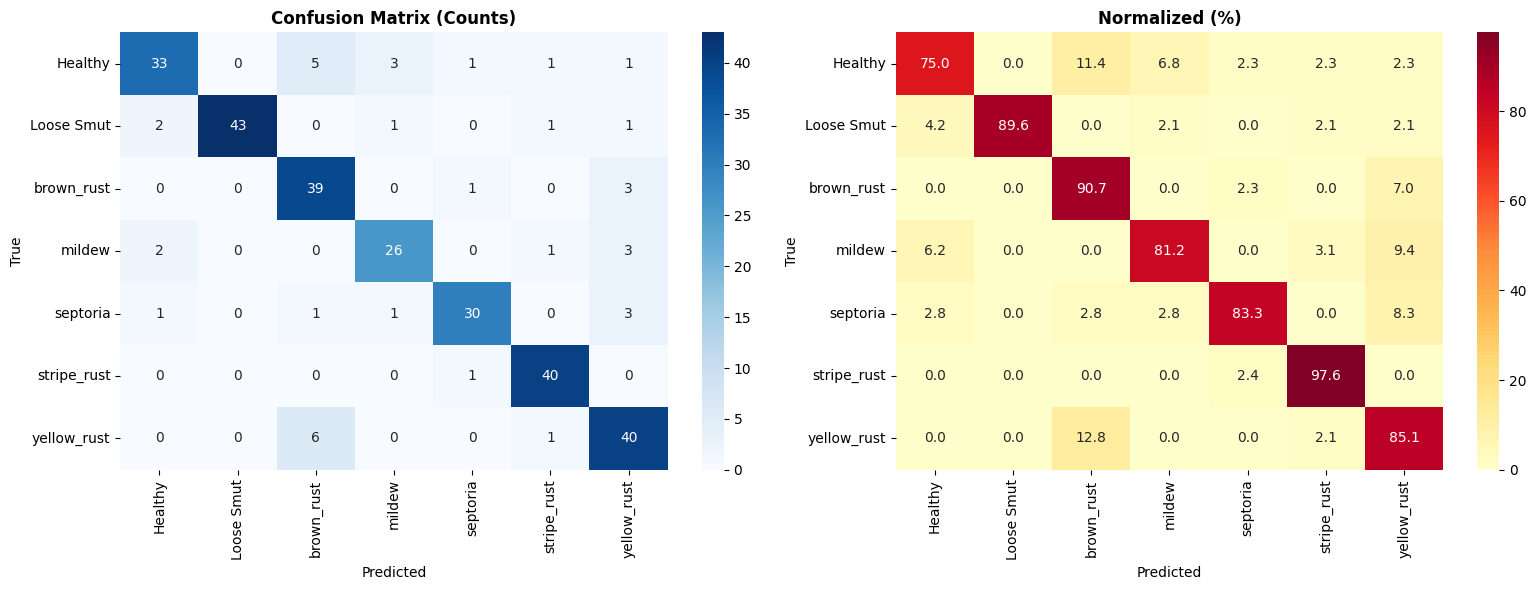

In [32]:
# ============================================================================
# CONFUSION MATRIX
# ============================================================================
cm = confusion_matrix(y_true, y_pred)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,
            yticklabels=class_names, ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')
axes[0].set_ylabel('True')
axes[0].set_xlabel('Predicted')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_norm, annot=True, fmt='.1f', cmap='YlOrRd', xticklabels=class_names,
            yticklabels=class_names, ax=axes[1])
axes[1].set_title('Normalized (%)', fontweight='bold')
axes[1].set_ylabel('True')
axes[1].set_xlabel('Predicted')
plt.tight_layout()
plt.show()

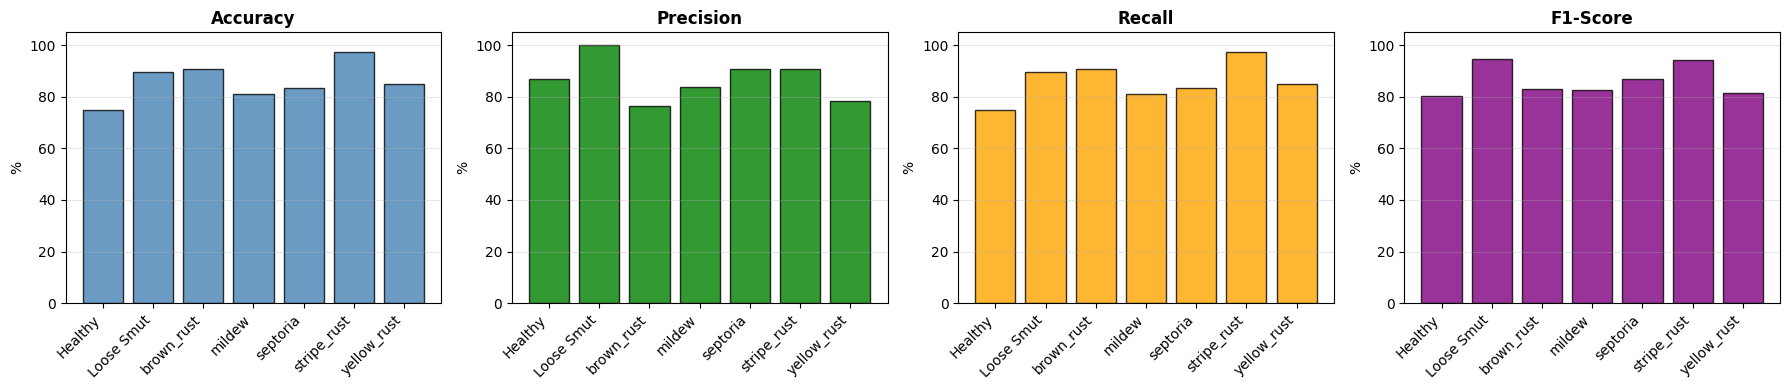

In [33]:
# ============================================================================
# PER-CLASS ACCURACY
# ============================================================================
from sklearn.metrics import precision_recall_fscore_support
prec, rec, f1, supp = precision_recall_fscore_support(y_true, y_pred)
acc_per_class = [accuracy_score(y_true[y_true==i], y_pred[y_true==i])*100 
                 for i in range(n_classes)]

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
for ax, data, title, color in zip(axes, 
    [acc_per_class, prec*100, rec*100, f1*100],
    ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    ['steelblue', 'green', 'orange', 'purple']):
    ax.bar(class_names, data, color=color, edgecolor='black', alpha=0.8)
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel('%')
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_ylim(0, 105)
    ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

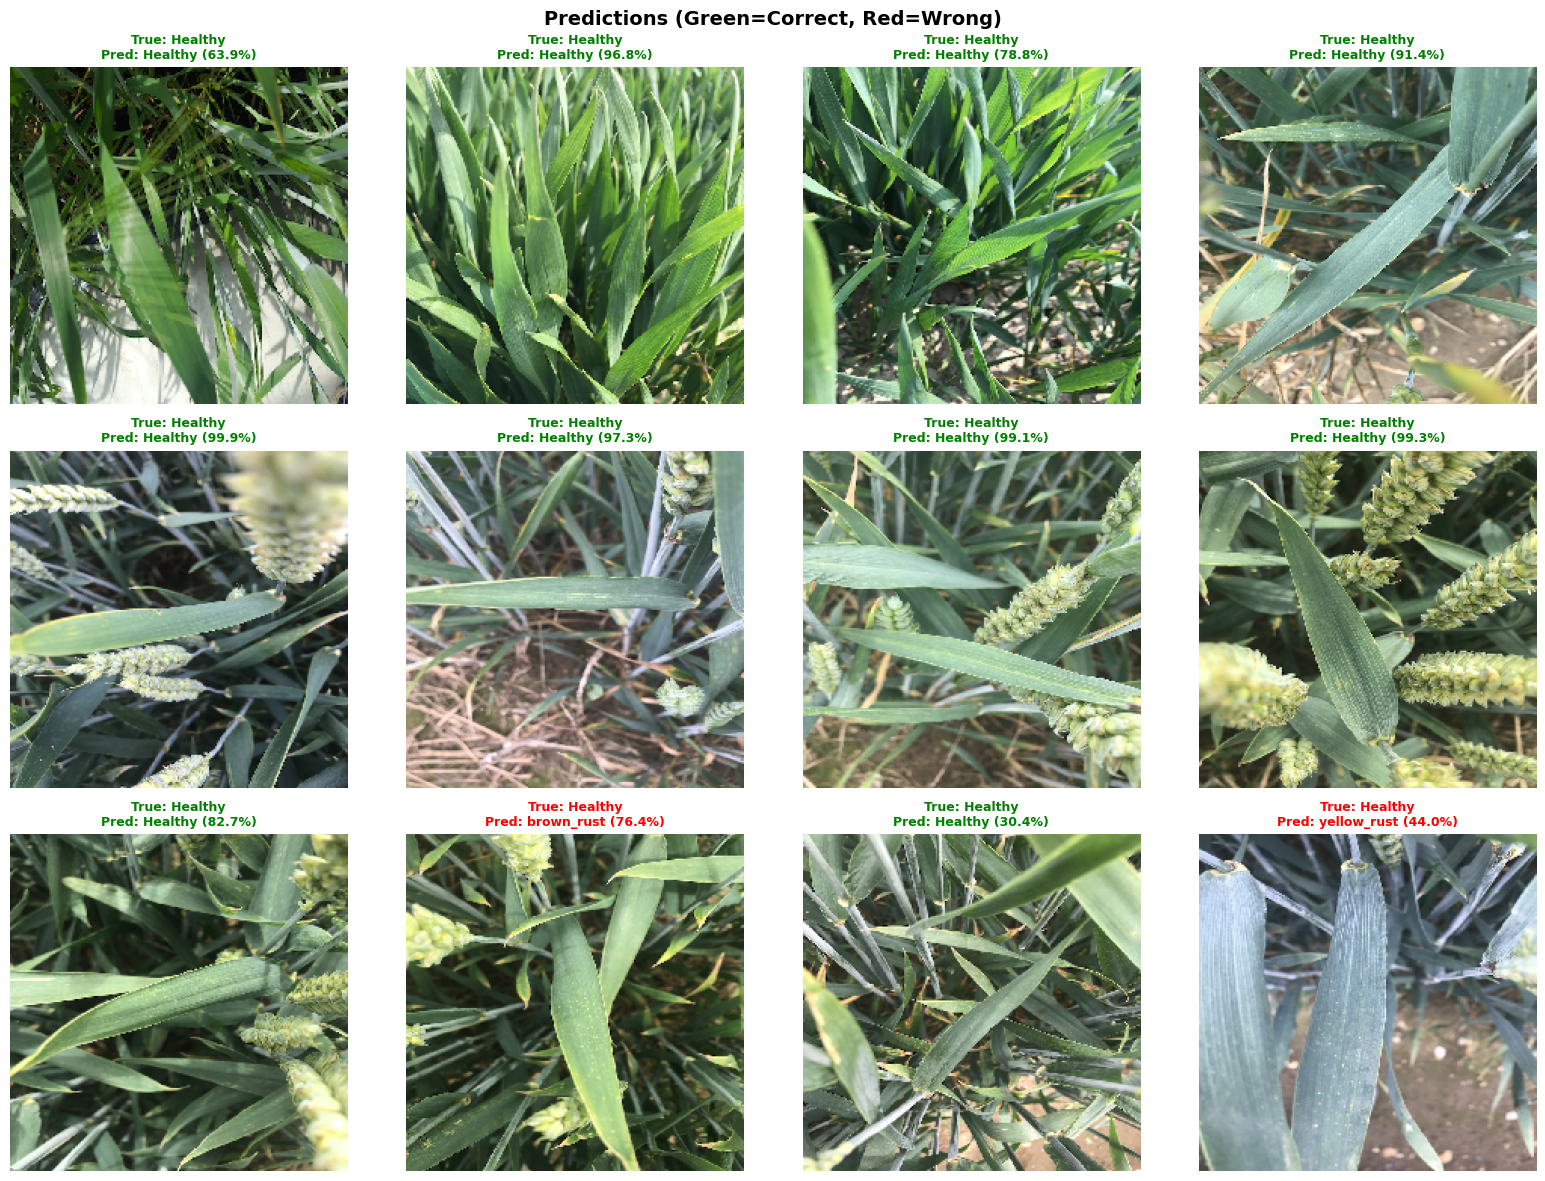

In [35]:
# ============================================================================
# PREDICTION SAMPLES
# ============================================================================
val_gen.reset()
x_batch, y_batch = next(val_gen)
preds = model.predict(x_batch[:12], verbose=0)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for i, ax in enumerate(axes.flat):
    # Denormalize for display
    img = x_batch[i].copy()
    img = (img - img.min()) / (img.max() - img.min())
    
    true_idx = np.argmax(y_batch[i])
    pred_idx = np.argmax(preds[i])
    conf = preds[i][pred_idx] * 100
    
    ax.imshow(img)
    color = 'green' if pred_idx == true_idx else 'red'
    ax.set_title(f"True: {class_names[true_idx]}\nPred: {class_names[pred_idx]} ({conf:.1f}%)",
                 color=color, fontweight='bold', fontsize=9)
    ax.axis('off')
plt.suptitle('Predictions (Green=Correct, Red=Wrong)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [36]:
# ============================================================================
# SAVE MODEL
# ============================================================================
model.save('wheat_disease_final.h5')
print("\n✅ Model saved: wheat_disease_final.h5")

# TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
print("✅ TFLite saved: model.tflite")

# Class names
with open('classes.txt', 'w') as f:
    f.write('\n'.join(class_names))
print("✅ Classes saved: classes.txt")


✅ Model saved: wheat_disease_final.h5
INFO:tensorflow:Assets written to: /tmp/tmpl_p0yfra/assets


INFO:tensorflow:Assets written to: /tmp/tmpl_p0yfra/assets


Saved artifact at '/tmp/tmpl_p0yfra'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_488')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  138417646190672: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138417647680784: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138417956230480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138417956225680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138417956227984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138417956227024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138417956230864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138417956236240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138417956235280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138417956237200: TensorSpec(shape=(), dtype=tf.resource, name=

W0000 00:00:1768496144.523640      47 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1768496144.523681      47 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1768496144.708014      47 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


✅ TFLite saved: model.tflite
✅ Classes saved: classes.txt


In [37]:
# ============================================================================
# INFERENCE FUNCTION
# ============================================================================
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = preprocess_input(img)  # ✅ Proper preprocessing
    img = np.expand_dims(img, 0)
    
    pred = model.predict(img, verbose=0)[0]
    idx = np.argmax(pred)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"{class_names[idx]} ({pred[idx]*100:.1f}%)", fontweight='bold')
    plt.axis('off')
    
    plt.subplot(122)
    top5_idx = np.argsort(pred)[::-1][:5]
    plt.barh([class_names[i] for i in top5_idx], [pred[i]*100 for i in top5_idx])
    plt.xlabel('Confidence (%)')
    plt.title('Top 5 Predictions', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print("\n✅ Use: predict_image('path/to/image.jpg')")
print("\n" + "="*80)
print("🎉 TRAINING COMPLETE!")
print("="*80)


✅ Use: predict_image('path/to/image.jpg')

🎉 TRAINING COMPLETE!


In [38]:
import tensorflow as tf
import os

H5_PATH = "wheat_disease_final.h5"
TF_EXPORT_DIR = "wheat_disease_tf"

# load .h5 model
model = tf.keras.models.load_model(H5_PATH)

# export as SavedModel
model.export(TF_EXPORT_DIR)

print("✅ SavedModel exported to:", TF_EXPORT_DIR)
print("Files:", os.listdir(TF_EXPORT_DIR))


INFO:tensorflow:Assets written to: wheat_disease_tf/assets


INFO:tensorflow:Assets written to: wheat_disease_tf/assets


Saved artifact at 'wheat_disease_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  138416533793360: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138416533797008: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138416533793168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138416533791056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138416533790096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138416533790864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138416533793552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138416533790288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138416821420688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138416821421264: TensorSpec(shape=(), dtype=tf.resource, name=Non

In [39]:
import shutil

shutil.make_archive("wheat_disease_tf", "zip", "wheat_disease_tf")

print("✅ Zipped file created: wheat_disease_tf.zip")


✅ Zipped file created: wheat_disease_tf.zip
